In [1]:
# https://stackoverflow.com/questions/16780014/import-file-from-parent-directory
import sys
sys.path.append("../")
# import ../db.py
from utils import *
from align_utils import *

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

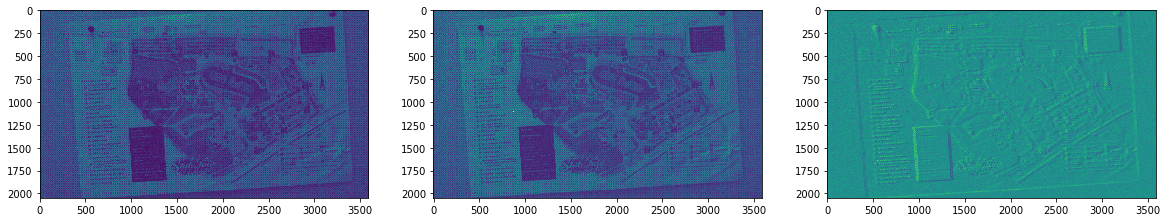

In [3]:
rIm=read_raw("../static_videos/lowlight3_frame47_tremor_rg10_2.raw", 
             frame = 10, rows=1087*2, runL=3968)


ref, alt = rIm[0][:2048, :3584], rIm[9][30:30+2048, 40:40+3584]
fig, ax = plt.subplots(1, 3, figsize=(20, 16))
ax[0].imshow(ref)  # frame 0
ax[1].imshow(alt) # frame 1
ax[2].imshow(ref - alt)
plt.show()

# DEBUGGING (can skip)

In [4]:
ref, alt = downsample2x2(ref), downsample2x2(alt)
## crop to 1792x1024

In [5]:
gpref, gpalt = gauss_pyramid(ref, scale_list = [2, 4, 4]), gauss_pyramid(alt, scale_list = [2, 4, 4])

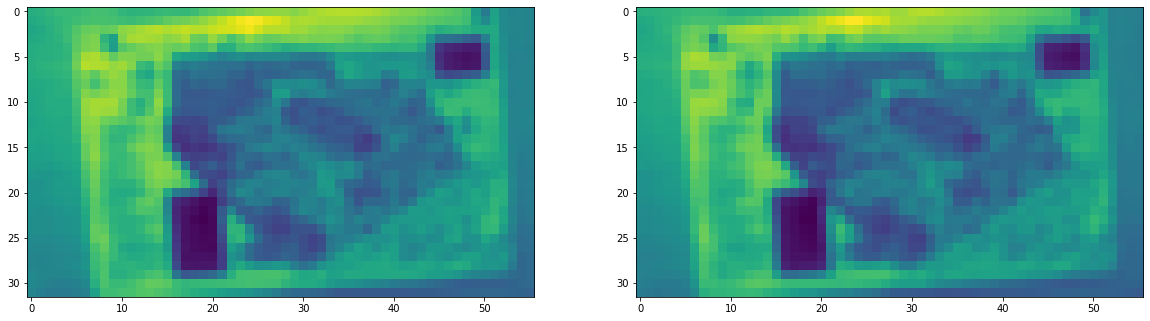

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(20, 16))
ax[0].imshow(gpref[-1])  # frame 0
ax[1].imshow(gpalt[-1]) # frame 1
plt.show()

In [7]:
gpref[-1].shape

(32, 56)

In [8]:
align_field = align_one_level(gpref[-1], gpalt[-1], None, 8, 4, 2)

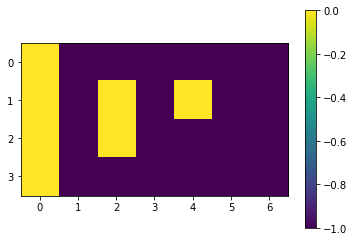

In [9]:
plt.imshow(align_field[..., 1])
plt.colorbar()
plt.show()

In [10]:
upsampled_align_field = upsample_align_field(align_field, 2)

(4, 7, 2) (8, 14, 2)


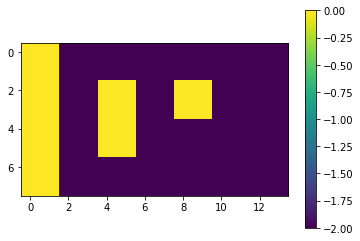

In [11]:
print(align_field.shape, upsampled_align_field.shape)
plt.imshow(upsampled_align_field[..., 1])
plt.colorbar()
plt.show()

In [12]:
align_field = align_one_level(gpref[-2], gpalt[-2],upsampled_align_field, 16, 4, 2)
upsampled_align_field = upsample_align_field(align_field, 4)

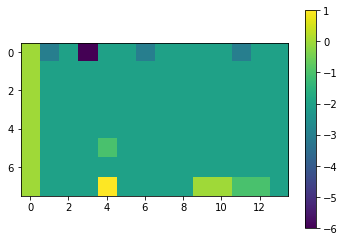

In [13]:
plt.imshow(align_field[..., 1])
plt.colorbar()
plt.show()

In [14]:
align_field = align_one_level(gpref[-3], gpalt[-3], upsampled_align_field, 16, 4, 2)
upsampled_align_field = upsample_align_field(align_field, 2)

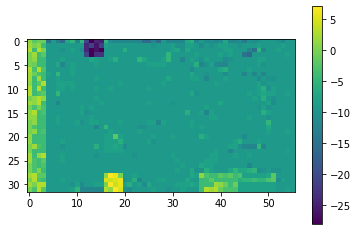

In [15]:
plt.imshow(align_field[..., 1])
plt.colorbar()
plt.show()

In [16]:
final_align_field = align_one_level(gpref[0], gpalt[0], upsampled_align_field, 16, 1, 1)

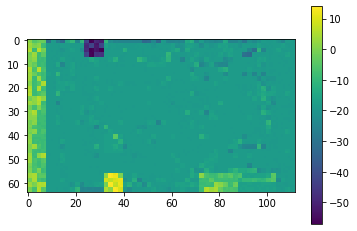

In [17]:
plt.imshow(final_align_field[..., 1])
plt.colorbar()
plt.show()

# MAIN CODE BLOCK
## main function

In [18]:
final_align_field = align_gauss_pyramid_hdrplus(gpref, gpalt)

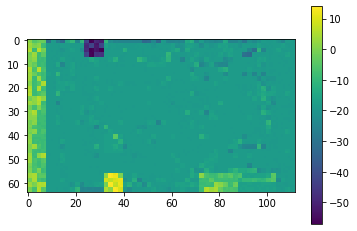

In [19]:
plt.imshow(final_align_field[..., 1])
plt.colorbar()
plt.show()

In [20]:
print_stat("final_align_field", final_align_field)

final_align_field shape:  (64, 112, 2) dtype: int16
final_align_field stat: max: 30, min: -57, mean: -11.309291294642858, std: 7.574953784186286


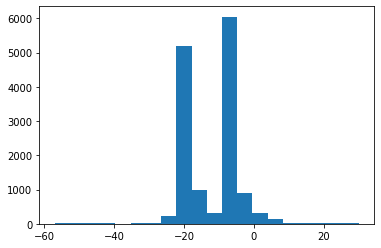

In [21]:
plt.hist(final_align_field.flatten(), 20)
plt.show()

In [22]:
final_align_field.shape

(64, 112, 2)

In [23]:
alt.shape

(1024, 1792)

In [24]:
alignedImg = align_final(alt, final_align_field, 16)

## before alignment

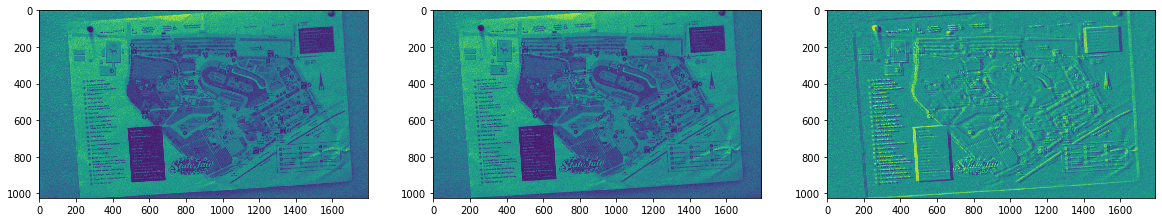

In [25]:
fig, ax = plt.subplots(1, 3, figsize=(20, 16))
ax[0].imshow(ref)
ax[1].imshow(alt) # frame 1
ax[2].imshow(ref - alt)
plt.show()

total error: 2486421.0


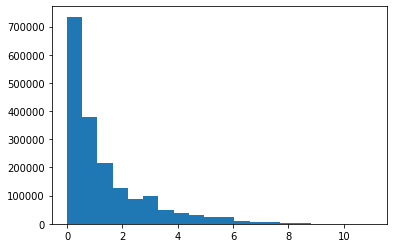

In [26]:
print("total error:", np.sum(np.abs(ref - alt)))
plt.hist(np.abs(ref - alt).flatten(), 20)
plt.show()

## after alignment

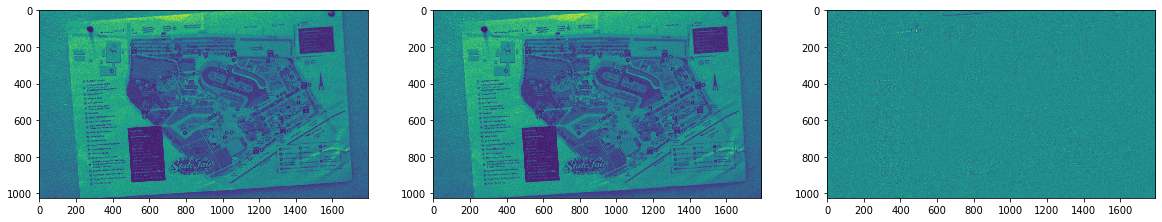

In [27]:
fig, ax = plt.subplots(1, 3, figsize=(20, 16))
ax[0].imshow(ref)
ax[1].imshow(alignedImg) # frame 1
ax[2].imshow(ref - alignedImg)
plt.show()

total error: 1064513.0


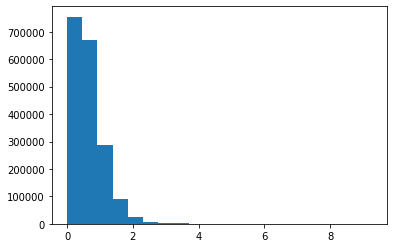

In [28]:
print("total error:", np.sum(np.abs(ref - alignedImg)))
plt.hist(np.abs(ref - alignedImg).flatten(), 20)
plt.show()

In [29]:
# np.save("final_align_field.npy", final_align_field)